In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
import h5py
import os
import analysis

In [2]:
wall_src_file = '/Users/theoares/lqcd/npr_momfrac/analysis_output/jobZq19214/Zq.h5'
wk, wp, wZq = analysis.load_Zq(wall_src_file)
wp_squared = np.array([analysis.square(p) for p in wp])
Zq_wall = np.mean(wZq, axis = 1)
σZq_wall = np.std(wZq, axis = 1)

<IPython.core.display.Javascript object>


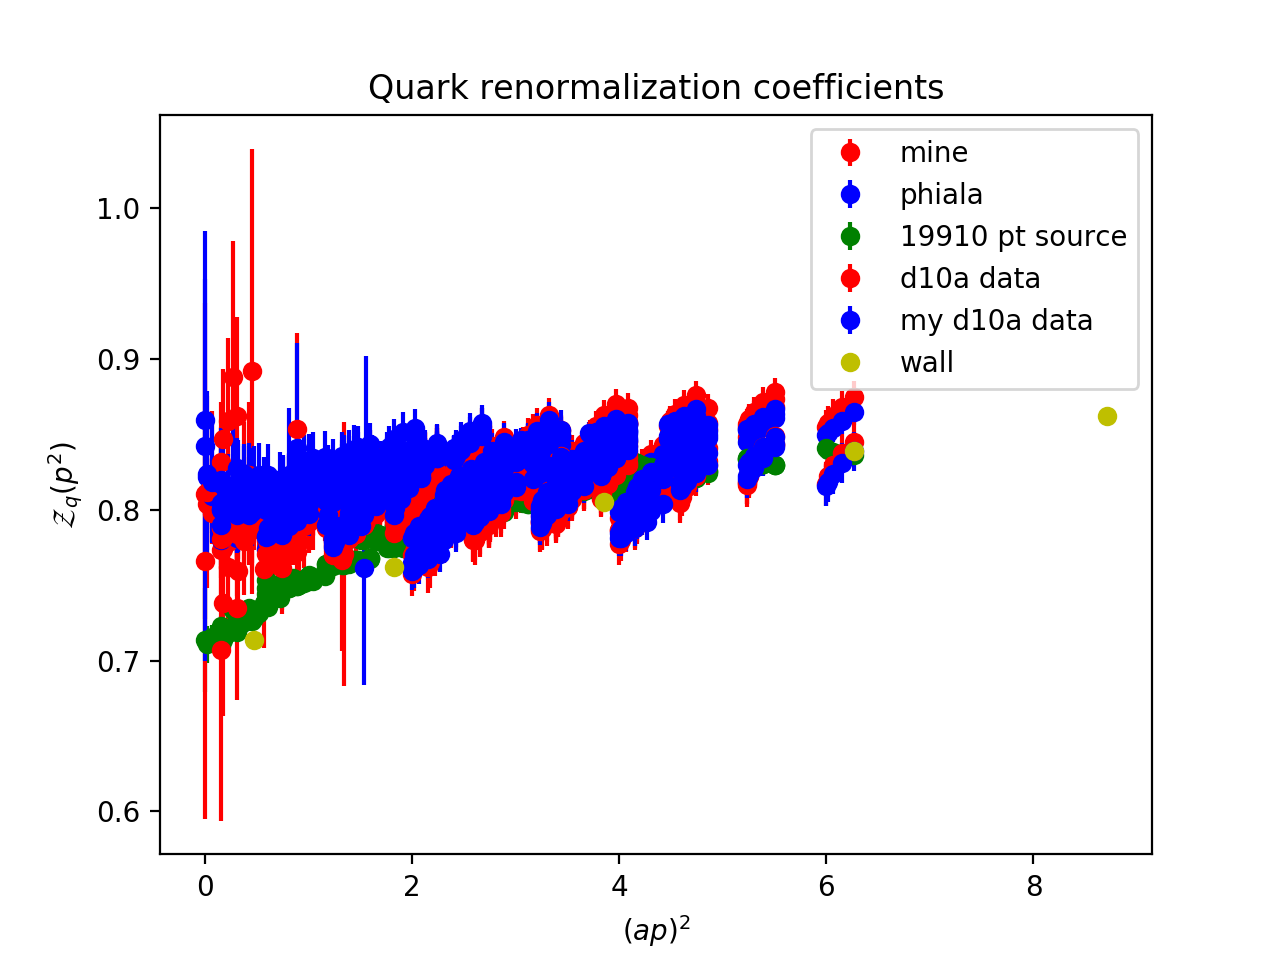

In [3]:
V = (16 ** 3) * 48

plt.figure()
out_file = '/Users/theoares/lqcd/npr_momfrac/analysis_output/jobZq21664/Zq.h5'
k_list, mom_list, Zq = analysis.load_Zq(out_file)
p_squared = np.array([np.abs(analysis.square(p)) for p in mom_list])
Zq_μ = np.mean(Zq, axis = 1)
Zq_σ = np.std(Zq, axis = 1)

out_file2 = '/Users/theoares/lqcd/npr_momfrac/analysis_output/jobZq21664/phialaZq.h5'
k_list2, mom_list2, Zq2 = analysis.load_Zq(out_file2)
Zq2_μ = np.mean(Zq2, axis = 1)
Zq2_σ = np.std(Zq2, axis = 1)

out_file3 = '/Users/theoares/lqcd/npr_momfrac/analysis_output/jobZq19910/checkZq.h5'
k_list3, mom_list3, Zq3 = analysis.load_Zq(out_file3)
Zq3_μ = np.mean(Zq3, axis = 1) * V
Zq3_σ = np.std(Zq3, axis = 1) * V

out_file4 = '/Users/theoares/lqcd/npr_momfrac/analysis_output/d10a_data/Zq.h5'
k_list4, mom_list4, Zq4 = analysis.load_Zq(out_file4)
Zq4_μ = np.mean(Zq4, axis = 1)
Zq4_σ = np.std(Zq4, axis = 1)


out_file5 = '/Users/theoares/lqcd/npr_momfrac/analysis_output/meas_quarkNPR/Zq.h5'    #d10a script run on my computer
k_list5, mom_list5, Zq5 = analysis.load_Zq(out_file5)
Zq5_μ = np.mean(Zq5, axis = 1)
Zq5_σ = np.std(Zq5, axis = 1)

# note that my output shouldn't match exactly with Phiala's becase we are using different points, but they should statistically be the same.
plt.errorbar(p_squared, np.real(Zq_μ), yerr = np.real(Zq_σ), label = 'mine', fmt = 'o', c = 'r')
plt.errorbar(p_squared, np.real(Zq2_μ), yerr = np.real(Zq2_σ), label = 'phiala', fmt = 'o', c = 'b')
plt.errorbar(p_squared, np.real(Zq3_μ), yerr = np.real(Zq3_σ), label = '19910 pt source', fmt = 'o', c = 'g')
plt.errorbar(p_squared, np.real(Zq4_μ), yerr = np.real(Zq4_σ), label = 'd10a data', fmt = 'o', c = 'r')
plt.errorbar(p_squared, np.real(Zq5_μ), yerr = np.real(Zq5_σ), label = 'my d10a data', fmt = 'o', c = 'b')

# k_rep_list, Zq4_orb_μ, Zq4_orb_σ = analysis.average_O3_orbits(Zq, k_list4)
# p_orb_squared = np.array([np.abs(analysis.square(analysis.to_lattice_momentum(k))) for k in k_rep_list])
# plt.errorbar(p_orb_squared, np.real(Zq4_orb_μ), yerr = np.real(Zq4_orb_σ), label = 'averaged over orbits', fmt = 'o', c = 'b')

plt.errorbar(wp_squared, np.real(Zq_wall), label = 'wall', fmt = 'o', c = 'y')
plt.legend()
plt.title('Quark renormalization coefficients')
plt.ylabel('$\mathcal{Z}_q(p^2)$')
plt.xlabel('$(ap)^2$')
plt.show()

In [ ]:
# plt.savefig('/Users/theoares/lqcd/npr_momfrac/analysis_output/Plots/d10a_measNPR_data.pdf')

In [ ]:
# plt.savefig('/Users/theoares/lqcd/npr_momfrac/analysis_output/Plots/' + str(jobid) + '/Zq.pdf')